In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
d = pd.read_csv('titanic_dataset.csv')

In [3]:
df = pd.DataFrame(d)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.shape

(891, 12)

Out of 891 rows cabin has 687 null values

and age has 177 null values

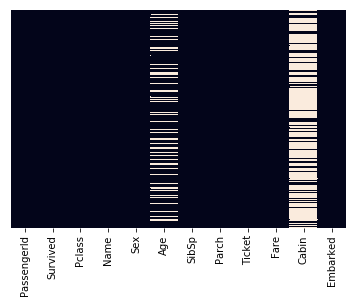

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False) 

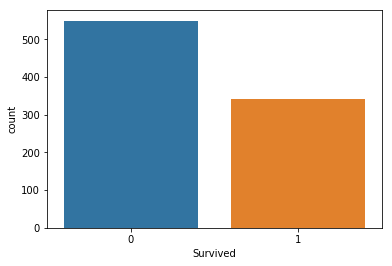

In [8]:
sns.countplot(x='Survived',data=df)

blue indicates number of people not survived

and 1 indicated number of people survived

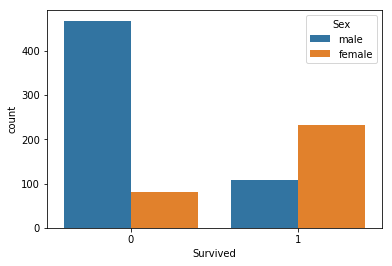

In [9]:
sns.countplot(x='Survived' , hue='Sex' ,data=df)

Count of survived ones on the basis of sex

It can be clearly seen that majority of the people who did not survive are male

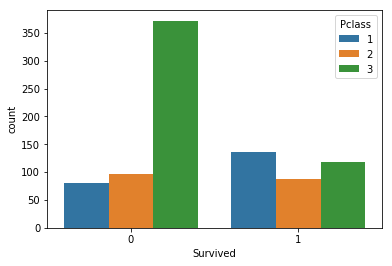

In [10]:
sns.countplot(x='Survived' , hue='Pclass' ,data=df)

It is clear from the plot that Pclass = 3 people are the majority who died

Pclass 1 people has least count on not survived plot

In [11]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Highest varience is in passengerID as it is a unique Id

Secound is of Age range is app. (79)

Slight skewness can be seen in fare , Age columns

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


All the columns are in appropriate datatypes :

except age shold be int.

Embarked has 2 null values

In [13]:
null_rows = (891-204)/891*100

In [14]:
null_rows

77.10437710437711

percentage of null rows in cabin column is 77 %

Its better to drop cabin because

77% rows are null



In [15]:
df.drop('Cabin',axis=1,inplace=True)

In [16]:
numerical_features = [i for i in df if df[i].dtypes!='O']

In [17]:
numerical_features

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [18]:
categorical_features = [i for i in df if df[i].dtypes=='O']

In [19]:
categorical_features

['Name', 'Sex', 'Ticket', 'Embarked']

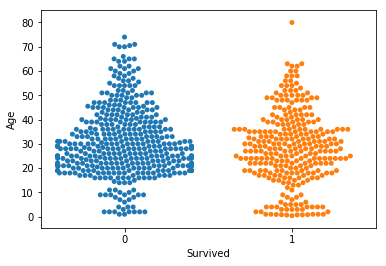

In [20]:
sns.swarmplot(x='Survived',y='Age',data=df)

Majority of the people who did not survive ranges from 20 to 30 years of age

In [21]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

Maximum number of people were in class:3

Least number of people were in class:2

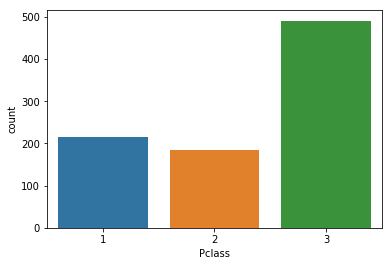

In [22]:
sns.countplot(x='Pclass',data=df)

replacing null values

In [23]:
df['Embarked'] = np.where(df['Embarked'].isnull(),df['Embarked'].mode(),df['Embarked'])

In [24]:
df['Embarked'].isnull().sum()

0

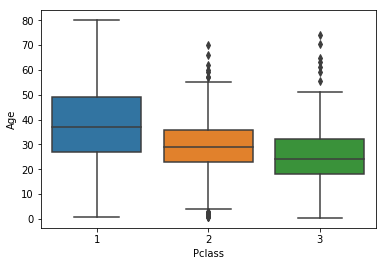

In [25]:
sns.boxplot(x='Pclass' , y='Age' , data=df)

average age in pclass 1 is 37(app.)

avg. age in class 2 is 30(app.)

avg. age in class 3 is 24(app.)

In [27]:
df['Age'] = np.where(df['Age'].isnull(),df['Age'].median(),df['Age'])

In [28]:
df['Age'].isnull().sum()

0

In [29]:
df.drop(['PassengerId','Name'],axis=1,inplace=True)

dropped passenger id and name because both are unique

In [30]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked'],
      dtype='object')

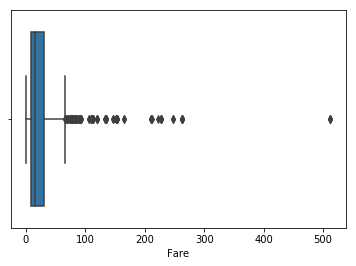

In [31]:
sns.boxplot(df['Fare'])

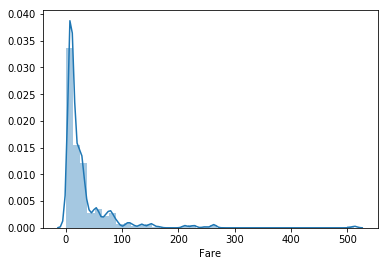

In [32]:
sns.distplot(df['Fare'],bins=40)

Replacing values greater than 100 with median

In [33]:
df['Fare'] = np.where(df['Fare']>100,df['Fare'].median(),df['Fare'])

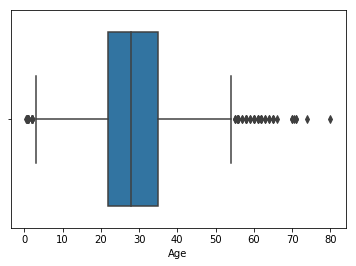

In [34]:
sns.boxplot(df['Age'])

It may possible that the people can be 60 to 80 years of age

so keeping it

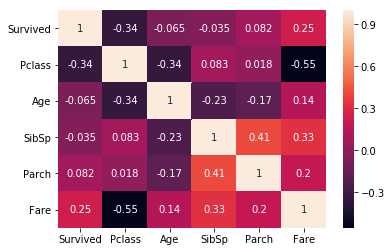

In [35]:
sns.heatmap(df.corr(),annot=True)

Highest corr with Pclass

And least corr with parch

In [36]:
df['Age'].skew()

0.5102446555756495

In [37]:
df['Fare'].skew()

1.7682149194660524

#Fare is skewed

In [38]:
df['Fare'] = np.sqrt(df['Fare'])

In [39]:
df['Fare'].skew()

0.9797120923424475

In [40]:
df['Fare_new'] = np.log(df['Fare'])

C:\Users\Aayushi Lashkari\Anaconda3\anacona_new\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [41]:
df.drop('Fare_new',axis=1,inplace=True)

It gives nan values

In [42]:
df['Fare_n'] = np.sqrt(df['Fare'])

In [43]:
df['Fare_n'].skew() # Now the skewness is removed

-0.5302223058210567

In [44]:
df.drop('Fare',axis=1,inplace=True)

In [45]:
from sklearn.preprocessing import LabelEncoder

In [46]:
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])

In [47]:
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])

In [48]:
df['Sex'].value_counts()

1    577
0    314
Name: Sex, dtype: int64

577 males

314 females

In [49]:
df['Embarked'].value_counts()

2    646
0    168
1     77
Name: Embarked, dtype: int64

In [50]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Embarked,Fare_n
0,0,3,1,22.0,1,0,A/5 21171,2,1.640909
1,1,1,0,38.0,1,0,PC 17599,0,2.905674
2,1,3,0,26.0,0,0,STON/O2. 3101282,2,1.677837
3,1,1,0,35.0,1,0,113803,2,2.699440
4,0,3,1,35.0,0,0,373450,2,1.684414


In [51]:
df.drop('Ticket',axis=1,inplace=True)

Dropped ticket column because it has all unique values and its encoding will increase the dimensions abruptly

In [52]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [53]:
df_new = pd.DataFrame(sc.fit_transform(df),columns=df.columns)

In [54]:
df_new.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Fare_n
0,-0.789272,0.827377,0.737695,-0.565736,0.432793,-0.473674,0.585954,-0.773636
1,1.266990,-1.566107,-1.355574,0.663861,0.432793,-0.473674,-1.942303,1.855406
2,1.266990,0.827377,-1.355574,-0.258337,-0.474545,-0.473674,0.585954,-0.696874


In [55]:
x = df_new.drop('Survived',axis=1)

In [56]:
y = df['Survived']

separated target and independed variable

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression

In [58]:
for i in range(1,1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.33,random_state=i)
    lr =  LogisticRegression()
    lr.fit(x_train,y_train)
    pred_test = lr.predict(x_test)
    pred_train = lr.predict(x_train)
    if(round(accuracy_score(pred_test,y_test)*100,1)==round(accuracy_score(pred_train,y_train)*100,1)):
        print('random state',i)
        print('test accuracy',accuracy_score(pred_test,y_test))
        print('train accuracy',accuracy_score(pred_train,y_train))

random state 57
test accuracy 0.8
train accuracy 0.8003355704697986
random state 102
test accuracy 0.7966101694915254
train accuracy 0.7969798657718121
random state 119
test accuracy 0.7966101694915254
train accuracy 0.7969798657718121
random state 263
test accuracy 0.7966101694915254
train accuracy 0.7969798657718121
random state 294
test accuracy 0.7966101694915254
train accuracy 0.7969798657718121
random state 338
test accuracy 0.7966101694915254
train accuracy 0.7969798657718121
random state 360
test accuracy 0.7966101694915254
train accuracy 0.7969798657718121
random state 420
test accuracy 0.8
train accuracy 0.8003355704697986
random state 484
test accuracy 0.7966101694915254
train accuracy 0.7969798657718121
random state 584
test accuracy 0.7966101694915254
train accuracy 0.7969798657718121
random state 759
test accuracy 0.7898305084745763
train accuracy 0.790268456375839
random state 782
test accuracy 0.8
train accuracy 0.8003355704697986
random state 817
test accuracy 0.8
trai

taking 57 as best random_state for splitting the data

In [59]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.33,random_state=57)

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [61]:
algo = [DecisionTreeClassifier,SVC,KNeighborsClassifier,LogisticRegression]

In [62]:
for i in algo:
    obj = i()
    obj.fit(x_train,y_train)
    pred = obj.predict(x_test)
    print(i,'accuracy_score',accuracy_score(y_test,pred))
    print('confusion_matrix',confusion_matrix(y_test,pred))
    print('classification_report',classification_report(y_test,pred))
    print('-------------------------------------------------------------')

<class 'sklearn.tree._classes.DecisionTreeClassifier'> accuracy_score 0.8033898305084746
confusion_matrix [[149  32]
 [ 26  88]]
classification_report               precision    recall  f1-score   support

           0       0.85      0.82      0.84       181
           1       0.73      0.77      0.75       114

    accuracy                           0.80       295
   macro avg       0.79      0.80      0.79       295
weighted avg       0.81      0.80      0.80       295

-------------------------------------------------------------
<class 'sklearn.svm._classes.SVC'> accuracy_score 0.8203389830508474
confusion_matrix [[163  18]
 [ 35  79]]
classification_report               precision    recall  f1-score   support

           0       0.82      0.90      0.86       181
           1       0.81      0.69      0.75       114

    accuracy                           0.82       295
   macro avg       0.82      0.80      0.80       295
weighted avg       0.82      0.82      0.82       295

--

SVM and Decision Tree are giving almost same results

In [63]:
from sklearn.model_selection import cross_val_score

In [64]:
svm = SVC()

In [65]:
for i in range(2,21):
    svm.fit(x_train,y_train)
    pred = obj.predict(x_test)
    print('accuracy_score',accuracy_score(y_test,pred))
    cross_score = cross_val_score(lr,x,y,cv=i)
    print('cv. ',i)
    print(cross_score.mean())
    print('-------')

accuracy_score 0.8
cv.  2
0.7845165516198922
-------
accuracy_score 0.8
cv.  3
0.7845117845117845
-------
accuracy_score 0.8
cv.  4
0.7845210681533552
-------
accuracy_score 0.8
cv.  5
0.7867679367271357
-------
accuracy_score 0.8
cv.  6
0.7788938267126185
-------
accuracy_score 0.8
cv.  7
0.7822781917885264
-------
accuracy_score 0.8
cv.  8
0.7878659909909911
-------
accuracy_score 0.8
cv.  9
0.7811447811447811
-------
accuracy_score 0.8
cv.  10
0.7878776529338328
-------
accuracy_score 0.8
cv.  11
0.78675645342312
-------
accuracy_score 0.8
cv.  12
0.7901201201201201
-------
accuracy_score 0.8
cv.  13
0.7901009902288675
-------
accuracy_score 0.8
cv.  14
0.7845273526077098
-------
accuracy_score 0.8
cv.  15
0.7867419962335217
-------
accuracy_score 0.8
cv.  16
0.7879058441558442
-------
accuracy_score 0.8
cv.  17
0.7900836677196277
-------
accuracy_score 0.8
cv.  18
0.7889342403628118
-------
accuracy_score 0.8
cv.  19
0.7890598373825405
-------
accuracy_score 0.8
cv.  20
0.787853535

accuracy is same and cv mean is almost same....

Taking 5 as the best cv fold

In [66]:
for i in algo:
    obj = i()
    obj.fit(x_train,y_train)
    pred = obj.predict(x_test)
    cross_score = cross_val_score(obj,x,y,cv=6)
    print('cross score',cross_score.mean())
    print(i,'accuracy_score',accuracy_score(y_test,pred))
    print('confusion_matrix',confusion_matrix(y_test,pred))
    print('classification_report',classification_report(y_test,pred))
    print('-------------------------------------------------------------')
    

cross score 0.7609513876292401
<class 'sklearn.tree._classes.DecisionTreeClassifier'> accuracy_score 0.8101694915254237
confusion_matrix [[150  31]
 [ 25  89]]
classification_report               precision    recall  f1-score   support

           0       0.86      0.83      0.84       181
           1       0.74      0.78      0.76       114

    accuracy                           0.81       295
   macro avg       0.80      0.80      0.80       295
weighted avg       0.81      0.81      0.81       295

-------------------------------------------------------------
cross score 0.8193134409577363
<class 'sklearn.svm._classes.SVC'> accuracy_score 0.8203389830508474
confusion_matrix [[163  18]
 [ 35  79]]
classification_report               precision    recall  f1-score   support

           0       0.82      0.90      0.86       181
           1       0.81      0.69      0.75       114

    accuracy                           0.82       295
   macro avg       0.82      0.80      0.80      

SVC is giving best results

In [67]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],   
              'kernel': ['rbf','poly','linear']}

In [68]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(svm, param_grid, refit = True, scoring='accuracy') 

In [70]:
grid.fit(x,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'kernel': ['rbf', 'poly', 'linear']},
             scoring='accuracy')

In [72]:
best_para = grid.best_params_
print(best_para)
best_res = grid.best_score_
print(best_res)

{'C': 1, 'kernel': 'rbf'}
0.8249074132195091


These are the best parameters :
    
'C': 1 and kernel: rbf

In [73]:
svc_obj = SVC(C=1,kernel='rbf')
svc_obj.fit(x_train,y_train)
pred = svc_obj.predict(x_test)

In [74]:
print('accuracy_score',accuracy_score(y_test,pred))
print('confusion_matrix',confusion_matrix(y_test,pred))
print('classification_report',classification_report(y_test,pred))

accuracy_score 0.8203389830508474
confusion_matrix [[163  18]
 [ 35  79]]
classification_report               precision    recall  f1-score   support

           0       0.82      0.90      0.86       181
           1       0.81      0.69      0.75       114

    accuracy                           0.82       295
   macro avg       0.82      0.80      0.80       295
weighted avg       0.82      0.82      0.82       295



Saving best Model

In [75]:
import pickle
titanic= 'pickl_t.pkl'
pickle.dump(svc_obj,open(titanic,'wb'))

conclusion

In [76]:
original_res = np.array(y_test)
pred_res = np.array(svc_obj.predict(x_test))
df_comparison = pd.DataFrame({'original':pred_res,'predicted':pred_res})
df_comparison

,original,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
290,1,1
291,0,0
292,0,0
293,0,0
